# Explore here

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import numpy as np



# URL of the CSV file
url = 'https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv'

# Read the CSV file from the URL and save it as a DataFrame
df = pd.read_csv(url, delimiter=',')

# Save the DataFrame to a CSV file in your project directory
df.to_csv('../data/raw/bank-marketing-campaign-data.csv', index=False)

print("CSV file has been downloaded and saved as a DataFrame.")

CSV file has been downloaded and saved as a DataFrame.


In [48]:
print(df.shape)
print(df.head())
print(df.columns)




(3140, 108)
   fips  TOT_POP    0-9  0-9 y/o % of total pop  19-Oct  \
0  1001    55601   6787               12.206615    7637   
1  1003   218022  24757               11.355276   26913   
2  1005    24881   2732               10.980266    2960   
3  1007    22400   2456               10.964286    2596   
4  1009    57840   7095               12.266598    7570   

   10-19 y/o % of total pop  20-29  20-29 y/o % of total pop  30-39  \
0                 13.735364   6878                 12.370281   7089   
1                 12.344167  23579                 10.814964  25213   
2                 11.896628   3268                 13.134520   3201   
3                 11.589286   3029                 13.522321   3113   
4                 13.087828   6742                 11.656293   6884   

   30-39 y/o % of total pop  ...  COPD_number  diabetes_prevalence  \
0                 12.749771  ...         3644                 12.9   
1                 11.564429  ...        14692                 12.0

In [19]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler

print(df)


       fips  TOT_POP    0-9  0-9 y/o % of total pop  19-Oct  \
0      1001    55601   6787               12.206615    7637   
1      1003   218022  24757               11.355276   26913   
2      1005    24881   2732               10.980266    2960   
3      1007    22400   2456               10.964286    2596   
4      1009    57840   7095               12.266598    7570   
...     ...      ...    ...                     ...     ...   
3135  56037    43051   6104               14.178532    6326   
3136  56039    23081   2384               10.328842    2185   
3137  56041    20299   3121               15.375142    3205   
3138  56043     7885    858               10.881420    1113   
3139  56045     6967    780               11.195637     779   

      10-19 y/o % of total pop  20-29  20-29 y/o % of total pop  30-39  \
0                    13.735364   6878                 12.370281   7089   
1                    12.344167  23579                 10.814964  25213   
2                    

In [49]:
print(df.columns[-1])
print(df.columns[1])

#I want to use heard disease number as the target variable, but first need to locate it in the dataframe

if "Heart disease_number" in df.columns:
    print("Column 'Heart disease_number' exists.")
else:
    print("Column not found.")


col_index = df.columns.get_loc("Heart disease_number") if "Heart disease_number" in df.columns else None
print("Index of 'Heart disease_number':", col_index)

print(df.columns[94])



Urban_rural_code
TOT_POP
Column 'Heart disease_number' exists.
Index of 'Heart disease_number': 94
Heart disease_number


Heart disease number is 94th column in the dataframe

In [50]:
X = df.drop(columns=["Heart disease_number"])
Y = df["Heart disease_number"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

selector = SelectKBest(score_func=f_classif, k=20)
X_selected = selector.fit_transform(X_scaled, Y)

selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

ValueError: could not convert string to float: 'Autauga'

In [54]:
string_columns = df.select_dtypes(include=['object', 'string']).columns
print(string_columns)

Index([], dtype='object')


In [55]:
#I want to drop the string columns
df = df.drop(columns=string_columns)

In [56]:
#I want to normalize everything by the TOT_POP column before I start the regression
df_normalized = df.div(df["TOT_POP"], axis=0)

In [58]:
df_normalized.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,0.018003,1.0,0.122066,0.000220,0.137354,0.000247,0.123703,0.000222,0.127498,0.000229,...,0.065538,0.000232,0.000214,0.000248,0.098236,0.000056,0.000052,0.000059,0.023848,0.000054
1,0.004600,1.0,0.113553,0.000052,0.123442,0.000057,0.108150,0.000050,0.115644,0.000053,...,0.067388,0.000055,0.000050,0.000060,0.094119,0.000015,0.000014,0.000016,0.025130,0.000018
2,0.040392,1.0,0.109803,0.000441,0.118966,0.000478,0.131345,0.000528,0.128652,0.000517,...,0.095374,0.000792,0.000748,0.000828,0.155540,0.000181,0.000169,0.000193,0.035650,0.000241
3,0.044955,1.0,0.109643,0.000489,0.115893,0.000517,0.135223,0.000604,0.138973,0.000620,...,0.079866,0.000629,0.000589,0.000665,0.112098,0.000147,0.000138,0.000161,0.026562,0.000089
4,0.017445,1.0,0.122666,0.000212,0.130878,0.000226,0.116563,0.000202,0.119018,0.000206,...,0.080584,0.000233,0.000218,0.000251,0.104028,0.000059,0.000055,0.000064,0.026055,0.000035


In [59]:
if "Heart disease_number" in df_normalized.columns:
    print("Column 'Heart disease_number' exists.")
else:
    print("Column not found.")


col_index = df_normalized.columns.get_loc("Heart disease_number") if "Heart disease_number" in df_normalized.columns else None
print("Index of 'Heart disease_number':", col_index)



Column 'Heart disease_number' exists.
Index of 'Heart disease_number': 92


In [ ]:
#Now, heart disease number is in index column 92

In [60]:
X = df_normalized.drop(columns=["Heart disease_number"])
Y = df_normalized["Heart disease_number"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

selector = SelectKBest(score_func=f_classif, k=20)
X_selected = selector.fit_transform(X_scaled, Y)

selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['0-9', '20-29', '70-79', 'White-alone pop', '% Black-alone',
       'Native American/American Indian-alone pop', 'Asian-alone pop',
       '% Asian-alone', 'Hawaiian/Pacific Islander-alone pop',
       '% Hawaiian/PI-alone', 'Total nurse practitioners (2019)',
       'Total physician assistants (2019)',
       'Internal Medicine Primary Care (2019)',
       'Total Specialist Physicians (2019)', 'ICU Beds_x',
       'Population Aged 60+', 'county_pop2018_18 and older', 'COPD_number',
       'diabetes_number', 'CKD_number'],
      dtype='object')


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [ 1 32] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [67]:
df_condensed = df_normalized[selected_features]



In [68]:
df_condensed.head()


,0-9,20-29,70-79,White-alone pop,% Black-alone,Native American/American Indian-alone pop,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Total nurse practitioners (2019),Total physician assistants (2019),Internal Medicine Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Population Aged 60+,county_pop2018_18 and older,COPD_number,diabetes_number,CKD_number
0,0.122066,0.123703,0.072840,0.767252,0.000353,0.004802,0.012248,0.000022,0.001115,2.005518e-06,0.000519,0.000109,0.000467,0.001297,0.000108,0.189259,0.763260,0.065538,0.098236,0.023848
1,0.113553,0.108150,0.096027,0.872852,0.000041,0.007724,0.011503,0.000005,0.000670,3.071512e-07,0.000519,0.000109,0.000467,0.001297,0.000234,0.245475,0.783921,0.067388,0.094119,0.025130
2,0.109803,0.131345,0.090189,0.490696,0.001945,0.006591,0.004542,0.000018,0.001849,7.430571e-06,0.000519,0.000109,0.000467,0.001297,0.000201,0.247177,0.791327,0.095374,0.155540,0.035650
3,0.109643,0.135223,0.076920,0.768348,0.000951,0.004375,0.002366,0.000011,0.001161,5.181760e-06,0.000519,0.000109,0.000467,0.001297,0.000000,0.213080,0.795223,0.079866,0.112098,0.026562
4,0.122666,0.116563,0.085252,0.958783,0.000028,0.006535,0.003198,0.000006,0.001210,2.092384e-06,0.000519,0.000109,0.000467,0.001297,0.000104,0.235131,0.768465,0.080584,0.104028,0.026055


<Axes: >

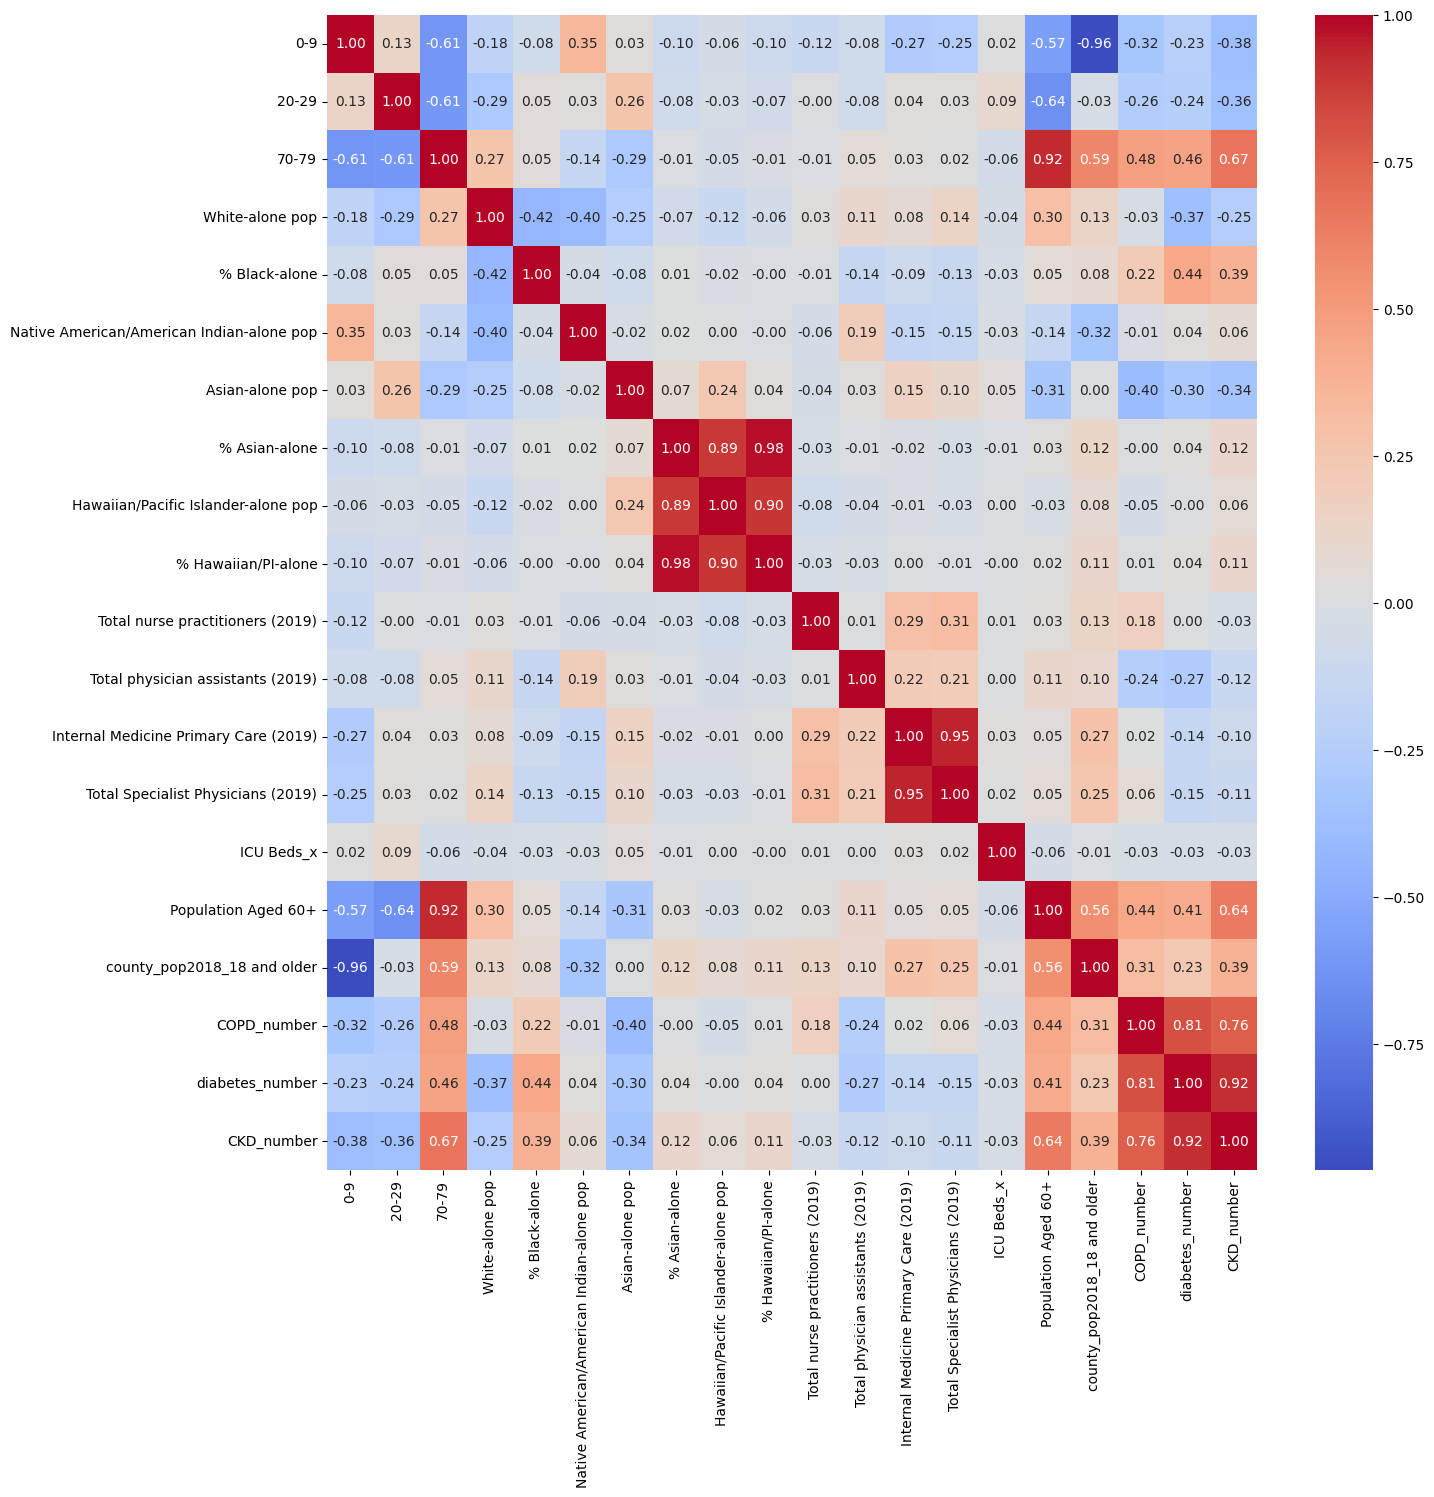

In [69]:


fig, axes = plt.subplots(figsize=(15, 15))
sns.heatmap(df_condensed.corr(), annot=True, fmt =".2f", cmap="coolwarm", annot_kws={"size":10})


In [ ]:
#Going to remove 0-9, % Hawaiian/PI-alone, 18 and older, Asian Alone